### An introduction to the *diwanalr* package

The ***diwanalr*** (**di**ffusing-**wa**ve spectroscopy (DWS) **anal**ysis using **R**) package contains a number of functions suitable for analysing DWS data. The package utilises two R packages, 'tidyverse' and 'ggplot2', in its implementation.

DWS is derived from dynamic light scattering which is an optical technique that studies the dynamics of scattered light. If carefully calibrated, DWS allows the quantitative measurement of microscopic motion in a soft material from which micro-rheology can be used to determine the rheological properties of a complex medium.

Research capability exists which allows the application of DWS to food systems. In some instances, the analysis of data resulting from such capability can be tedious (e.g. using spreadsheets). This package is intended to allow users of such capability to perform analysis of DWS data in a more straightforward manner.


If needed, the diwanalr package can be downloaded using:

In [ ]:
#install.packages("devtools") - 
devtools::install_github("peterjwatkins/diwanalr", force=TRUE)

In [ ]:
library(diwanalr)

One proposed workflow involves the calculation of the storage and loss moduli. The workflow consists of three steps:

1 - The temporal autocorrelation function, *g*$_{1}$(*t*)

In some cases, the output generated from research equipment consists of a CSV file, with two columns; the first being the correlation time while the second is the measured value of the intensity autocorrelation function, noted as *g*$_{2}$(*t*). This latter function, *g*$_{2}$(*t*), is related to *g*$_{1}$(*t*) by the Seigert relationship where *g*$_{2}$(*t*) = 1 + |*g*$_{1}$(*t*)|$^{2}$. The function, *calc_g1*, accepts a tibble consisting measured correlation times and *g*$_{2}$(*t*) values and produces a tibble with the associated *g*$_{1}$(*t*) and the scaled values, ranging from 0 to approximately 1. Some functionality is provided to allow the user to set an appropriate normalisation value. The function *plot_g1* can be used to visualise the output data. 

A sample dataset, *dws*, is available with the package.

In [59]:
data(dws)
## Note: column headings - time and g2 needed for later functions
str(dws)

'data.frame':	288 obs. of  2 variables:
 $ time: num  1.25e-08 2.50e-08 3.75e-08 5.00e-08 6.25e-08 7.50e-08 8.75e-08 1.00e-07 1.13e-07 1.25e-07 ...
 $ g2  : num  1.89 1.86 1.88 1.88 1.84 1.9 1.87 1.94 1.9 1.88 ...


In [60]:
d <- calc_g1(dws) # calc_g1 has an optional parameter, n, used for scaling g2 to g1 - the default value is 30
str(d)

'data.frame':	201 obs. of  3 variables:
 $ time    : num  1.25e-08 2.50e-08 3.75e-08 5.00e-08 6.25e-08 7.50e-08 8.75e-08 1.00e-07 1.13e-07 1.25e-07 ...
 $ Observed: num  0.943 0.927 0.938 0.938 0.917 ...
 $ Scaled  : num  1.008 0.991 1.002 1.002 0.979 ...


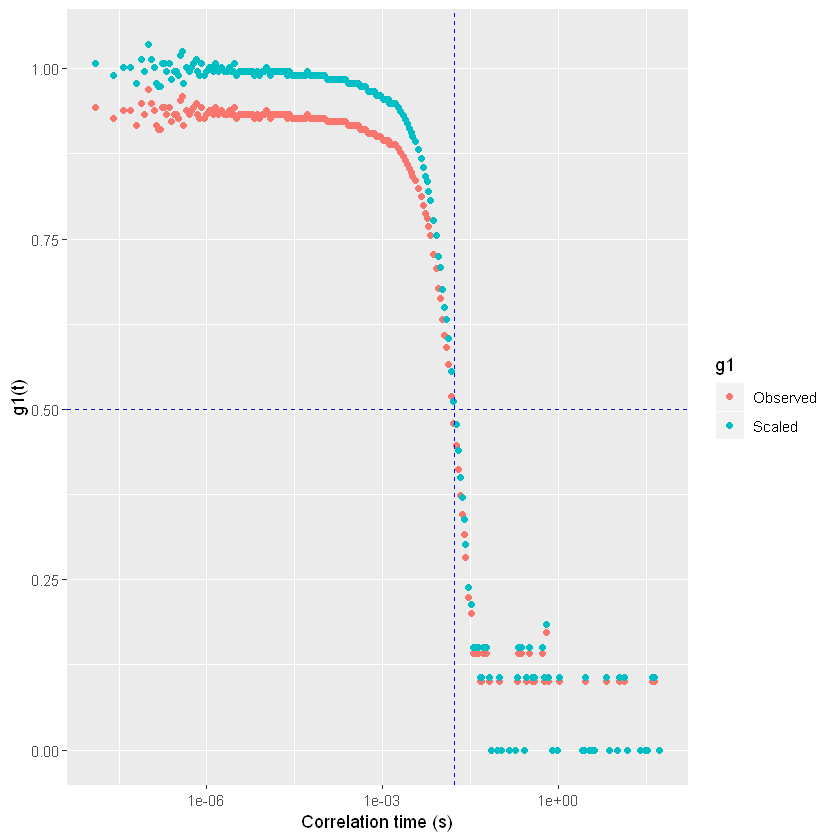

In [61]:
plot_g1(d)

2 - The mean square displacement.

The next stage involves calculating the mean square displacement (MSD), based on the scaled *g*$_{1}$(*t*) values. This involves finding the value that minimises a complex equation with the *g*$_{1}$(*t*) values. The calculation is based on Eq. 16-39b reported in Weitz and Pine, "Diffusing-wave spectroscopy" in Dynamic Light Scattering (ed Wyn Brown), OUP, 1993, pp. 652-720. Readers are encouraged to consult the reference for further detail. The function, *calc_msd* is used for this purpose, accepting the output from *calc_g1* and returning a tibble with the time and related MSD. The function *plot_msd* is available to visualise the output data.

In [62]:
e <- calc_msd(d)
str(e)

'data.frame':	156 obs. of  2 variables:
 $ time: num  2.50e-08 6.25e-08 8.75e-08 1.38e-07 1.50e-07 1.63e-07 2.00e-07 2.50e-07 2.75e-07 3.00e-07 ...
 $ msd : num  1.46e-17 2.19e-17 8.96e-18 2.19e-17 2.49e-17 ...
 - attr(*, "na.action")= 'omit' Named int  1 3 4 6 8 9 10 14 15 17 ...
  ..- attr(*, "names")= chr  "1" "3" "4" "6" ...


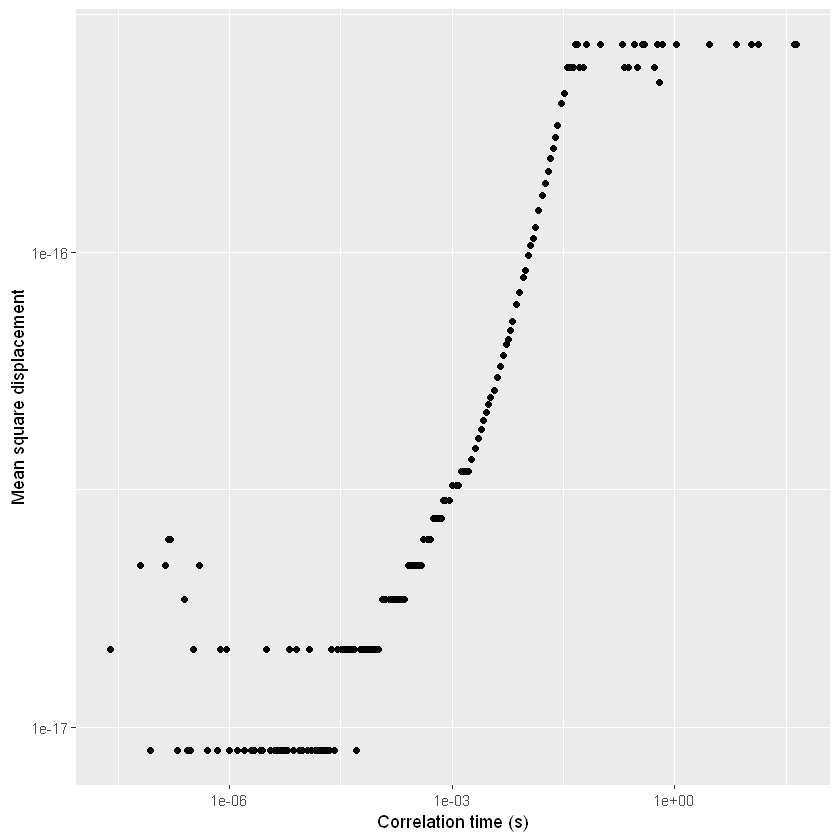

In [63]:
plot_msd(e)

3 - The viscoelastic, storage and loss moduli.

The last stage is to determine the viscoelastic modulus (*G*) from the mean square displacement, which is then used to determine the related storage and loss moduli. The function, *calc_modulus* is used for this purpose, accepting the output from *calc_msd* and returning a tibble with the time and related storage (*G'*) and loss (*G''*) moduli. The function *plot_modulus* is available to visualise the output data.

In [64]:
f <- calc_modulus(e)
str(f)

Classes 'tbl_df', 'tbl' and 'data.frame':	154 obs. of  3 variables:
 $ freq        : num  16000000 11428571 7246377 6666667 6134969 ...
 $ Storage (G'): num  94.2 299.1 -62.7 41.2 -80.4 ...
  ..- attr(*, "na.action")= 'omit' int  1 156
 $ Loss (G'')  : num  -32.64 53.4 8.05 104.51 -22.79 ...
  ..- attr(*, "na.action")= 'omit' int  1 156


Warning message in self$trans$transform(x):
"NaNs produced"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 165 rows containing missing values (geom_point)."

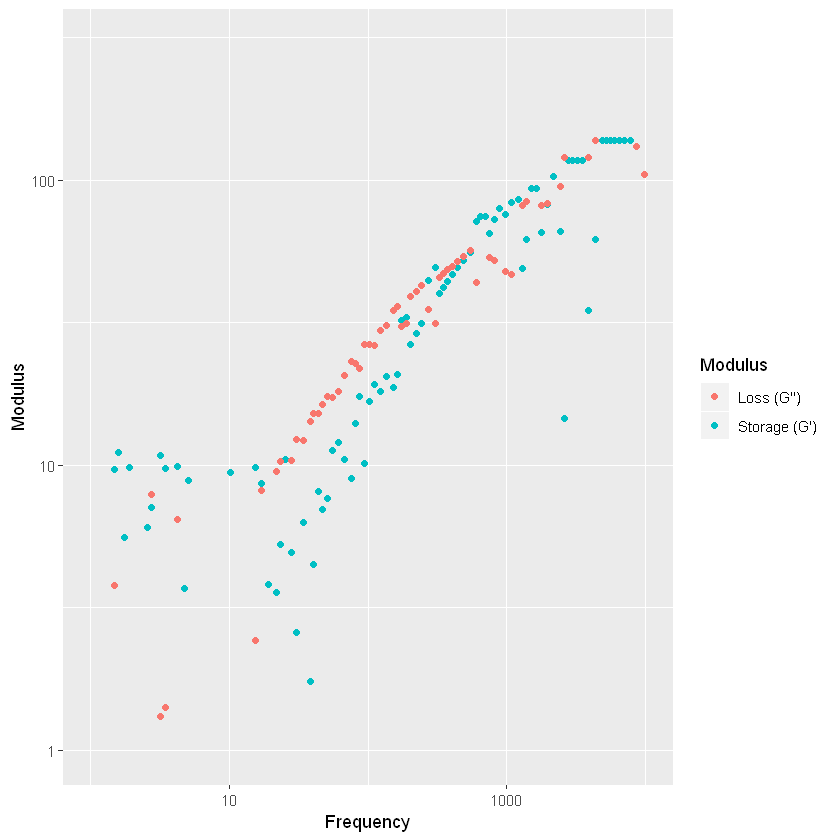

In [65]:
plot_modulus(f)